In [86]:
import numpy as np
import pandas as pd

# Input data files are available in the "../input/" directory.
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from subprocess import check_output
#print(check_output(["store.csv", "../input"]).decode("utf8"))
sales = pd.read_csv('store.csv') # load the dataset

<font size= "5">****(1) Explore the attributes of the dataset****<font>

In [2]:
#attributes are 'reps', 'product', 'qty', 'revenue', 'qqq'
#shape -> (10000,5)
sales.shape
sales.columns

Index(['reps', 'product', 'qty', 'revenue', 'region'], dtype='object')

In [3]:
sales['reps'].unique()
#sales['region'].unique()
#sales['product'].unique()

array(['Chitra', 'Vijay', 'Mala', 'Suman', 'Rachna', 'Aash', 'Chand',
       'Suraj', 'Bala', 'Seet', 'Ravi', 'Anusha', 'Ananya', 'Jaggi',
       'Reva', 'Meena', 'Sai', 'Rahul', 'Ram', 'Prarth', 'Pooja', 'Rishi',
       'Ranga', 'Sesh', 'Shaanth', 'Bharath', 'Susan', 'Ratna', 'Easwar',
       'Prasad', 'Madhu', 'Suresh', 'Anahit', 'Sumedh', 'Manju',
       'Nandini', 'Santosh', 'Satyen', 'Vaghya', 'Palak', 'Aparna',
       'Jagdish', 'Vish', 'Kumar', 'John', 'Bhat', 'Hussain', 'Alka',
       'Rohini', 'Keshab', 'Nidhi', 'Satya', 'Venkat', 'Veeyes', 'Rajat',
       'Chandra', 'Kamat', 'Raji', 'Swami', 'Jay', 'Mukund', 'Priya',
       'Kishen', 'Vidya', 'Akila', 'Durga', 'Mak', 'Mehta', 'Javed',
       'Sruti', 'Mukesh', 'Kishore'], dtype=object)

<font size=5>****(2) Encoding and Scaling the Data****<font>


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Starting necessary encoding and scaling 
le = LabelEncoder()
scaler = MinMaxScaler()
#scaler = StandardScaler() Tried with standard scaler but the result is not good

In [5]:
sales['region'] = le.fit_transform(sales['region'])
sales['product'] = le.fit_transform(sales['product'])
sales['reps'] = le.fit_transform(sales['reps'])
sales.head()

,reps,product,qty,revenue,region
0,12,3,2,155.10,3
1,70,5,2,39.30,1
2,28,2,3,74.25,3
3,60,1,3,100.98,1
4,41,8,2,44.98,1


>>****Min Max Scaling****

In [6]:
sales_scaled = scaler.fit_transform(sales)
sales_scaled

array([[0.16901408, 0.27272727, 0.04166667, 0.0690141 , 1.        ],
       [0.98591549, 0.45454545, 0.04166667, 0.0105387 , 0.33333333],
       [0.3943662 , 0.18181818, 0.08333333, 0.02818736, 1.        ],
       ...,
       [0.74647887, 0.        , 0.        , 0.00331765, 1.        ],
       [0.05633803, 1.        , 0.04166667, 0.02068858, 0.33333333],
       [0.85915493, 0.63636364, 0.        , 0.00211077, 1.        ]])

>>****Standard Scaling****

In [34]:
#Standard Scaling
#sales_scaled = scaler.fit_transform(sales)
#sales_scaled

In [7]:
col_names = ['reps', 'product', 'qty', 'revenue', 'region']
df = pd.DataFrame(sales_scaled, columns=col_names)
df.head()

,reps,product,qty,revenue,region
0,0.169014,0.272727,0.041667,0.069014,1.000000
1,0.985915,0.454545,0.041667,0.010539,0.333333
2,0.394366,0.181818,0.083333,0.028187,1.000000
3,0.845070,0.090909,0.083333,0.041685,0.333333
4,0.577465,0.727273,0.041667,0.013407,0.333333


<font size = 5>****(3) Applying PCA to identify vital features****<font>

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [34]:
#Visualize newly formed features
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-0.482686,-0.178536,0.336379
1,0.230387,-0.041381,-0.449488
2,-0.466288,-0.285553,0.119023
3,0.229629,-0.392463,-0.281137
4,0.198031,0.262033,-0.064695


<font size = 5>****(4) Making a 3D Plot function for visualization****<font>

In [55]:
def plot3D(df,color, title):
    threedee = plt.figure(figsize=(20,10)).gca(projection='3d')
    threedee.axes.xaxis.set_ticklabels([])
    threedee.axes.yaxis.set_ticklabels([])
    threedee.axes.zaxis.set_ticklabels([])
    threedee.scatter(df['principal component 1'], df['principal component 2'], df['principal component 3'], c=color)
    plt.title("{}".format(title), fontsize = 20)
    plt.show()

> ****Plotting in 3D space to fiure out the probable number of clusters****

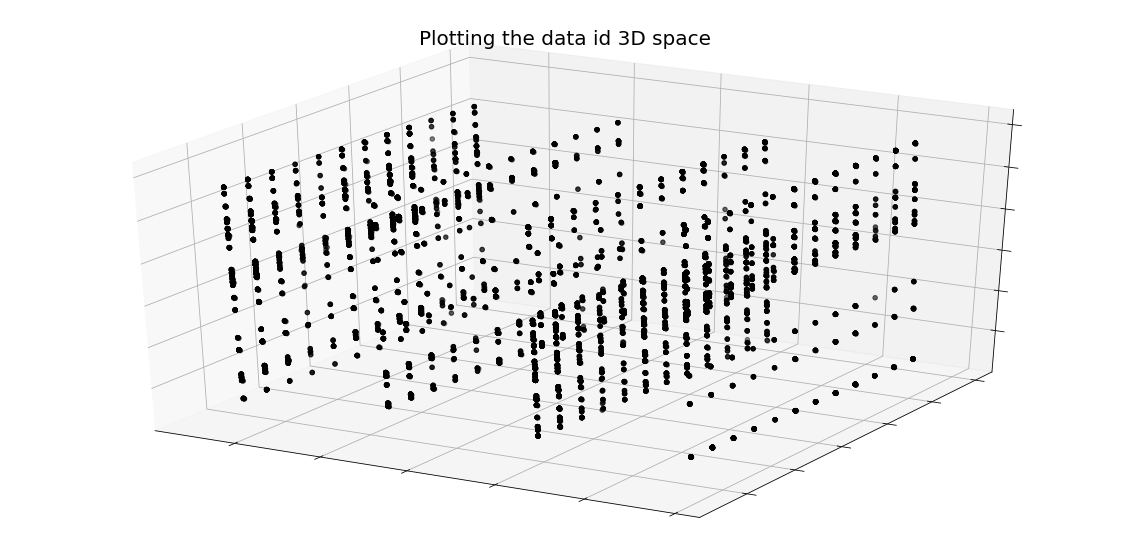

In [61]:
title = "Plotting the data id 3D space"
plot3D(principalDf,'black',title)

<font size = 5>****(5) K-Means Implementation with K=4****<font>

In [11]:
from sklearn.cluster import KMeans

number_of_clusters=4
km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,n_clusters=4, n_init=10, n_jobs=None, 
            precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)

km.fit(principalDf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
print(set(km.labels_))
print(km.cluster_centers_)
principalDf['clusters'] = km.labels_

{0, 1, 2, 3}
[[ 0.14769966  0.22261415 -0.22542738]
 [-0.42015836  0.01508866  0.11728655]
 [ 0.40723643  0.04422044  0.36712361]
 [ 0.12103599 -0.37040305 -0.18539724]]


>****Visualization of Clusters****

In [13]:
# create a array for label colors
colors = ['red', 'blue', 'green','brown']
# assign color to each cluster
pred_colors = [colors[label] for label in km.labels_]

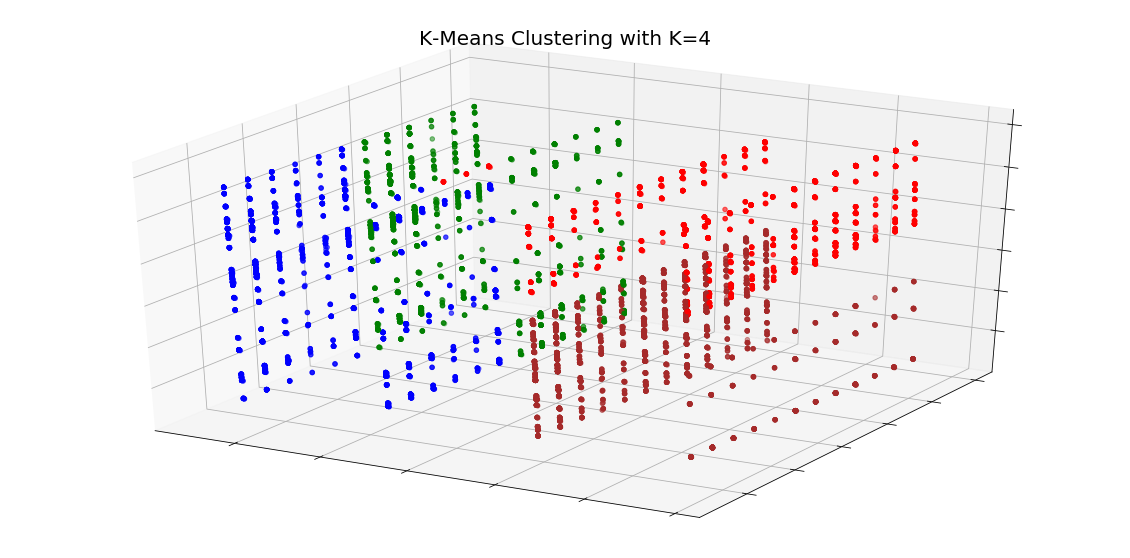

In [57]:
# plot the KMeans clusters
title = "K-Means Clustering with K=4"
plot3D(principalDf,pred_colors,title)


<font size = 5>****(6) K Medoids Implementation with k=4****<font>

>****Make up necessary fuctions for the algorithm****

In [35]:
#--------------------Function for initializing the medoids----------------------

def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

#--------------------Function for computing Euclidean distance between two points---------------

def compute_d_p(X, medoids, p):
    #Number of training examples
    m = len(X)
    medoids_shape = medoids.shape
    
    # If a 1-D array is provided, it will be reshaped to a single row 2-D array(In case of one princple component only)
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    
    #Number of clusters
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p
        
    return S

# ----------------Function for Label assignment--------------------

def assign_labels(S):
    return np.argmin(S, axis=1)

# -----------------Function for Medoid update after each iteration till convergence--------------
def update_medoids(X, medoids, p):
    
    S = compute_d_p(X, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(X, medoids[i], p))

        cluster_points = X[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(X, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

# --------------Checking Convergence-----------------

def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

# -------------Final implementation---------------------

def kmedoids(X, k, p, starting_medoids=None, max_steps=100):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        print("Starting convergence......")
        old_medoids = medoids.copy()
        S = compute_d_p(X, medoids, p)
        print("Computing distance....")
        labels = assign_labels(S)
        print("labeling done...")
        new_medoids = update_medoids(X, medoids, p)
        print("First iteration completed with medoids {}".format(medoids))
        converged = has_converged(old_medoids, new_medoids)
        print("Convergence checked....")      
        i += 1
    return (new_medoids,labels)

data_points = principalDf.values
results = kmedoids(data_points, 4, 2, starting_medoids=None, max_steps=10)

Starting convergence......
Computing distance....
labeling done...
First iteration completed with medoids [[ 0.19341224 -0.34382524  0.21342026]
 [-0.13339859 -0.01306035  0.02088534]
 [-0.13762283  0.16808963  0.00650303]
 [ 0.19790621  0.00331448  0.00532255]]
Convergence checked....
Starting convergence......
Computing distance....
labeling done...
First iteration completed with medoids [[ 0.18801196 -0.16805856  0.19763587]
 [-0.13339859 -0.01306035  0.02088534]
 [-0.13569727  0.07802202  0.01321038]
 [ 0.19790621  0.00331448  0.00532255]]
Convergence checked....
Starting convergence......
Computing distance....
labeling done...
First iteration completed with medoids [[ 0.18803663  0.01212036  0.19223988]
 [-0.13339859 -0.01306035  0.02088534]
 [-0.13551317  0.0775034   0.01369126]
 [ 0.19790621  0.00331448  0.00532255]]
Convergence checked....
Starting convergence......
Computing distance....
labeling done...
First iteration completed with medoids [[ 0.18533184  0.02015965  0.1850

In [74]:
final_medoids = results[0]
principalDf['medoid_clusters'] = results[1]

In [77]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,clusters,medoid_clusters
0,-0.482686,-0.178536,0.336379,1,1
1,0.230387,-0.041381,-0.449488,0,3
2,-0.466288,-0.285553,0.119023,1,1
3,0.229629,-0.392463,-0.281137,3,3
4,0.198031,0.262033,-0.064695,0,3


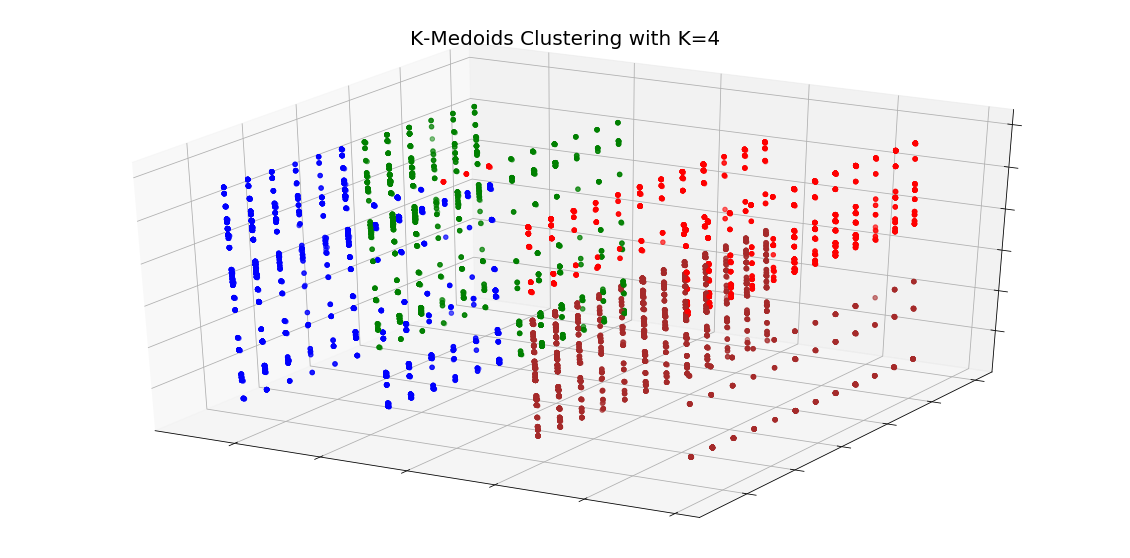

In [62]:
# create a array for label colors
colors = ['red', 'blue', 'green','brown']
# assign color to each cluster
pred_colors = [colors[label] for label in principalDf['clusters'].values]

# plot the K-Medoids clusters
title = "K-Medoids Clustering with K=4"
plot3D(principalDf,pred_colors,title)


In [79]:
new = principalDf[principalDf['clusters'] != principalDf['medoid_clusters']]
new.shape  

(6961, 5)

<font size = 5>****(7) Running EDA to extract EDA from the two models****<font>

In [81]:
principalDf[principalDf['clusters'] == 0].index

Int64Index([   1,    4,    8,   11,   14,   19,   22,   23,   25,   27,
            ...
            9960, 9962, 9965, 9967, 9972, 9981, 9982, 9983, 9984, 9987],
           dtype='int64', length=2872)

In [87]:
df_with_clusters = sales.join(principalDf)
df_with_clusters = df_with_clusters[['reps', 'product', 'qty', 'revenue', 'region','clusters', 'medoid_clusters']]

>****Explore the medoids clusters****

In [93]:
cluster_1 = df_with_clusters[df_with_clusters['medoid_clusters'] == 0][['reps','product','qty','revenue','region']]
cluster_2 = df_with_clusters[df_with_clusters['medoid_clusters'] == 1][['reps','product','qty','revenue','region']]
cluster_3 = df_with_clusters[df_with_clusters['medoid_clusters'] == 2][['reps','product','qty','revenue','region']]
cluster_4 = df_with_clusters[df_with_clusters['medoid_clusters'] == 3][['reps','product','qty','revenue','region']]

In [104]:
cluster_1.groupby(['region','reps','product'])['qty', 'revenue'].sum()

qty  revenue
region reps    product              
East   Aash    Almond   102  2535.02
               Alpen    186  6217.75
               Beacon    48  1190.76
               Galaxy    30  2378.10
               Halls     17   319.11
               Jet      145  2861.58
               Mars     173  4012.66
               Milka    127  2876.64
               Orbit    103  2323.66
               Prince    82  2221.74
               Star      62  1288.15
               Trident   60  1773.30
       Anusha  Almond    21   519.63
               Alpen     43  1444.32
               Beacon     6   148.13
               Galaxy     5   397.35
               Jet       48   955.40
               Mars      35   817.10
               Milka     18   407.47
               Orbit     11   249.69
               Prince     6   163.63
               Star      23   475.97
               Trident    8   237.60
       Durga   Almond    30   732.75
               Alpen     55  1838.38
               Beacon    14   344.51
               Galaxy     9   707.55
               Halls     11   205.68
               Jet       49   957.68
               Mars      16   371.31
...                     ...      ...
North  Chand   Prince    26   705.79
               Star      11   227.75
               Trident   41  1226.10
       Kamat   Almond    19   468.76
               Alpen     42  1421.54
               Beacon    14   347.25
               Galaxy     9   713.55
               Halls      7   131.39
               Jet       31   611.26
               Mars      13   298.92
               Milka     63  1436.55
               Orbit     20   454.63
               Prince     2    53.35
               Star       9   186.38
               Trident   14   413.10
       Kishore Almond    41  1011.26
               Alpen     63  2130.10
               Beacon    10   247.75
               Galaxy    57  4502.77
               Halls      4    75.43
               Jet       44   872.81
               Mars       3    70.50
               Milka     15   342.18
               Orbit     54  1229.54
               Prince     3    81.54
               Star      29   606.91
               Trident   12   355.20
South  Alka    Galaxy    16  1258.81
               Halls      9   168.91
               Jet       54  1070.41

[170 rows x 2 columns]

In [109]:
df_with_clusters.groupby(['reps','product','qty'])['revenue'].sum().nlargest(3)

reps   product  qty
Priya  Galaxy   19     2969.74
Mala   Galaxy   25     1998.75
John   Galaxy   24     1918.80
Name: revenue, dtype: float64

In [111]:
df_with_clusters[df_with_clusters['reps'] == 'Priya']['medoid_clusters'].unique()

array([2, 1], dtype=int64)

In [112]:
df_with_clusters[df_with_clusters['reps'] == 'Mala']['medoid_clusters'].unique()

array([1, 2], dtype=int64)

In [113]:
df_with_clusters[df_with_clusters['reps'] == 'John']['medoid_clusters'].unique()

array([1, 2], dtype=int64)

In [115]:
df_with_clusters[df_with_clusters['reps'] == 'Priya']['region'].unique()

array(['West'], dtype=object)

In [116]:
df_with_clusters[df_with_clusters['reps'] == 'Mala']['region'].unique()

array(['West'], dtype=object)

In [117]:
df_with_clusters[df_with_clusters['reps'] == 'John']['region'].unique()

array(['West'], dtype=object)

**So our exploration tells John, Mala and Priya run sales in west region they have proven success with same product (galaxy) and our K-Medoids algorithm putted them in the same cluster as well.
**

In [125]:
cluster_1.groupby('reps')['revenue'].sum().nlargest(10)

reps
Aash       29998.47
Ananya     18510.93
Hussain    17006.75
Kishore    11525.99
Keshab      9267.94
Aparna      9260.05
Kumar       9214.13
Kishen      8898.63
Durga       8505.90
Madhu       8346.54
Name: revenue, dtype: float64

In [126]:
cluster_2.groupby('reps')['revenue'].sum().nlargest(10)

reps
Seet       19097.38
Santosh    16436.94
Jagdish    14671.91
Vaghya     11483.79
Mala        9273.71
Suresh      9235.82
Bharath     8945.38
Easwar      8325.88
Priya       7972.89
Mehta       7326.56
Name: revenue, dtype: float64

In [127]:
cluster_3.groupby('reps')['revenue'].sum().nlargest(10)

reps
Seet       16650.03
Santosh    13364.77
Mala        9326.89
Jagdish     8962.22
Suresh      8587.62
Vaghya      8289.88
Sumedh      6639.52
Bharath     6533.34
Mehta       5999.30
Mak         5770.27
Name: revenue, dtype: float64

In [128]:
cluster_4.groupby('reps')['revenue'].sum().nlargest(10)

reps
Rachna     28263.75
Shaanth    27692.49
Ravi       27448.79
Nandini    26569.57
Vish       24834.71
Sai        24412.79
Suman      17274.12
Susan      13302.84
Ranga      11639.45
Satya      10568.62
Name: revenue, dtype: float64

In [129]:
cluster_1.groupby('product')['revenue'].sum().nlargest(10)

product
Alpen      31918.01
Milka      17984.28
Jet        17060.81
Galaxy     16931.73
Orbit      16684.73
Almond     13199.87
Mars       12561.69
Trident    11604.15
Star        7764.95
Beacon      7238.32
Name: revenue, dtype: float64

In [131]:
cluster_2.groupby('product')['revenue'].sum().nlargest(10)

product
Alpen     85677.79
Galaxy    45406.61
Almond    38293.55
Jet       36190.59
Beacon    28350.04
Halls      9224.86
Name: revenue, dtype: float64

In [136]:
cluster_3.groupby('product')['revenue'].sum().nlargest(10)

product
Orbit      47231.87
Milka      44966.03
Trident    33870.75
Mars       26272.75
Star       19966.36
Prince     15501.81
Name: revenue, dtype: float64

In [137]:
cluster_4.groupby('product')['revenue'].sum().nlargest(10)

product
Alpen      59556.27
Orbit      35367.65
Milka      31299.09
Jet        30826.16
Almond     29088.49
Galaxy     28580.84
Trident    26814.30
Mars       19275.16
Beacon     17576.05
Star       15906.68
Name: revenue, dtype: float64